# Open data, F.A.I.R.

Petr Čermák  
2024-10-03

## Connect

[slides.cermak.science/opendata](https://slides.cermak.science/opendata/presentation.html)

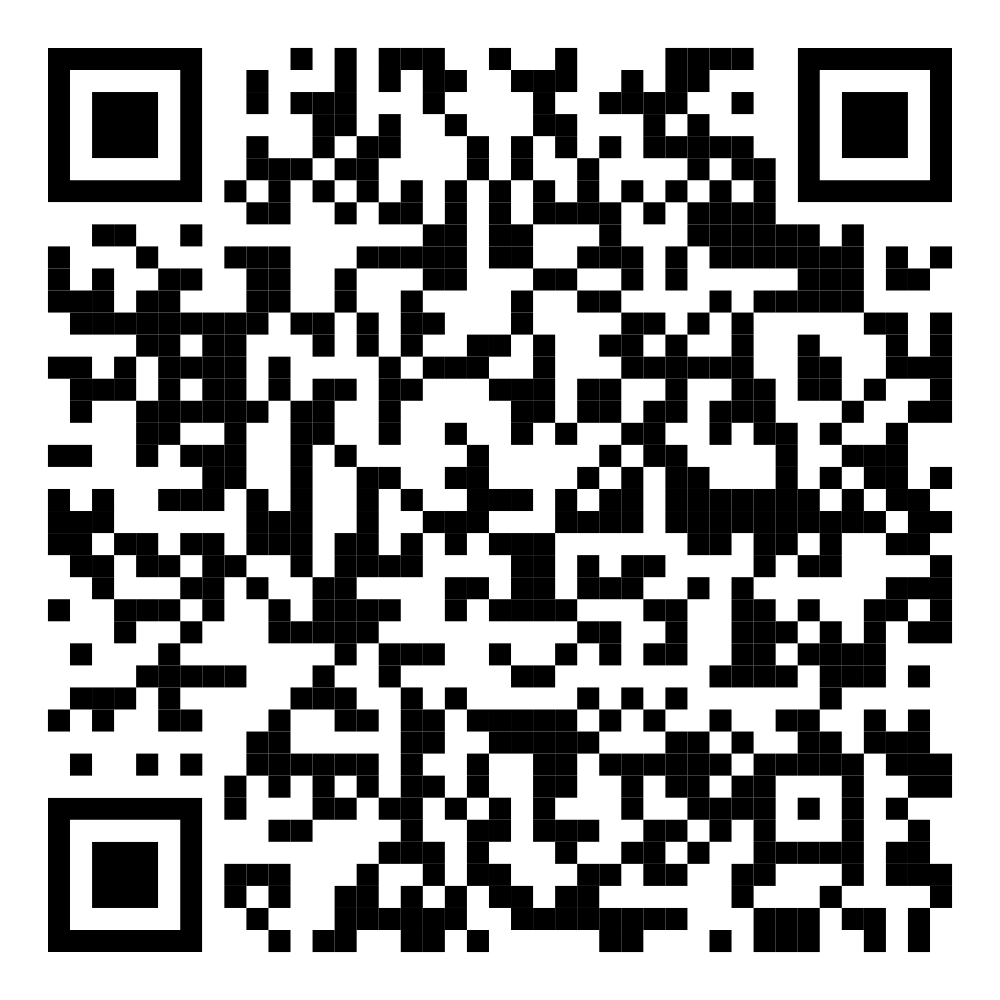

# Introduction

## What is F.A.I.R.?

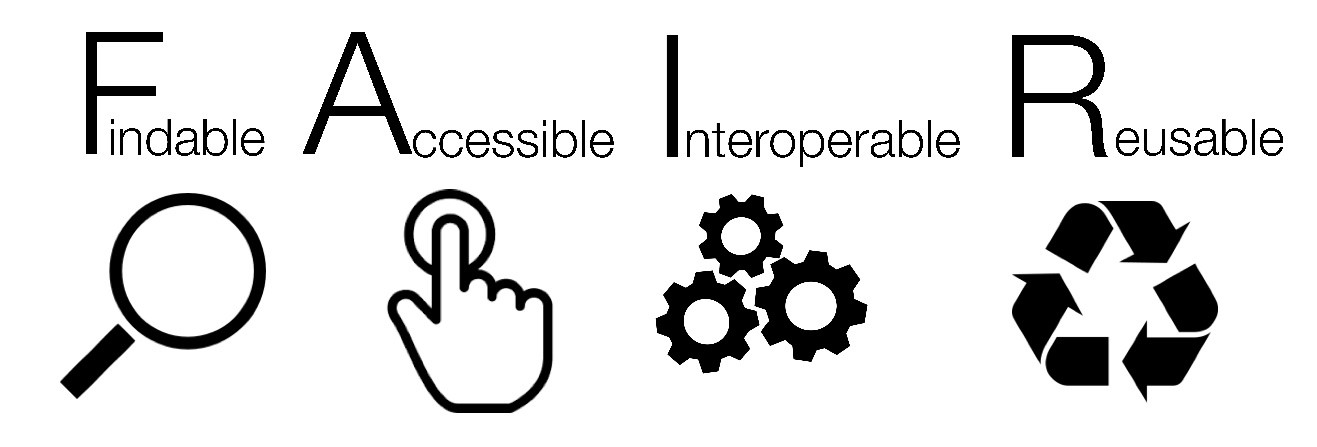

-   T as *Trustworthy*
    -   data are not modified
    -   metadata are correct (automatically filled)
    -   all data are published

## Findable

-   Does someone measured phonons in Silicon?
-   [Paper](https://doi.org/10.1103/PhysRevB.74.054302)
-   Findable?

. . .

-   [google
    ?](https://www.google.com/search?q=silicon+%223-axis+spectrometer%22++site%3Ahttps%3A%2F%2Fdoi.ill.fr)

## Accessible

-   defined access route to the data (API)
-   compare:
    -   [ILL](https://doi.ill.fr/10.5291/ILL-DATA.TEST-2385)
    -   [figshare](https://doi.org/10.6084/m9.figshare.24986532.v1)
-   –\> [machine readable data
    format](https://api.figshare.com/v2/articles/24986532)

## Interoperable

-   standardized data formats (described)
-   all parameters of the experiment are stored (metadata)
-   probably exists some package to read the data

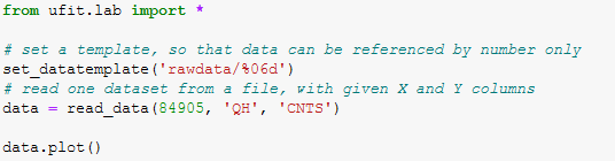

## Reusable

-   data can be uderstand by others
-   even after long time
-   great for education
-   reuse of scripts - speed up data evaluation

## WHY??

Currently it is almost impossible to check published results

Lot of grey/black/wrong approaches in the science.

. . .

### Solution?

Spend a lot of hours by properly describing your data.

or

Describe data with scipts!

# Describe data with scripts

-   idea: one script do all data evaluation for the paper

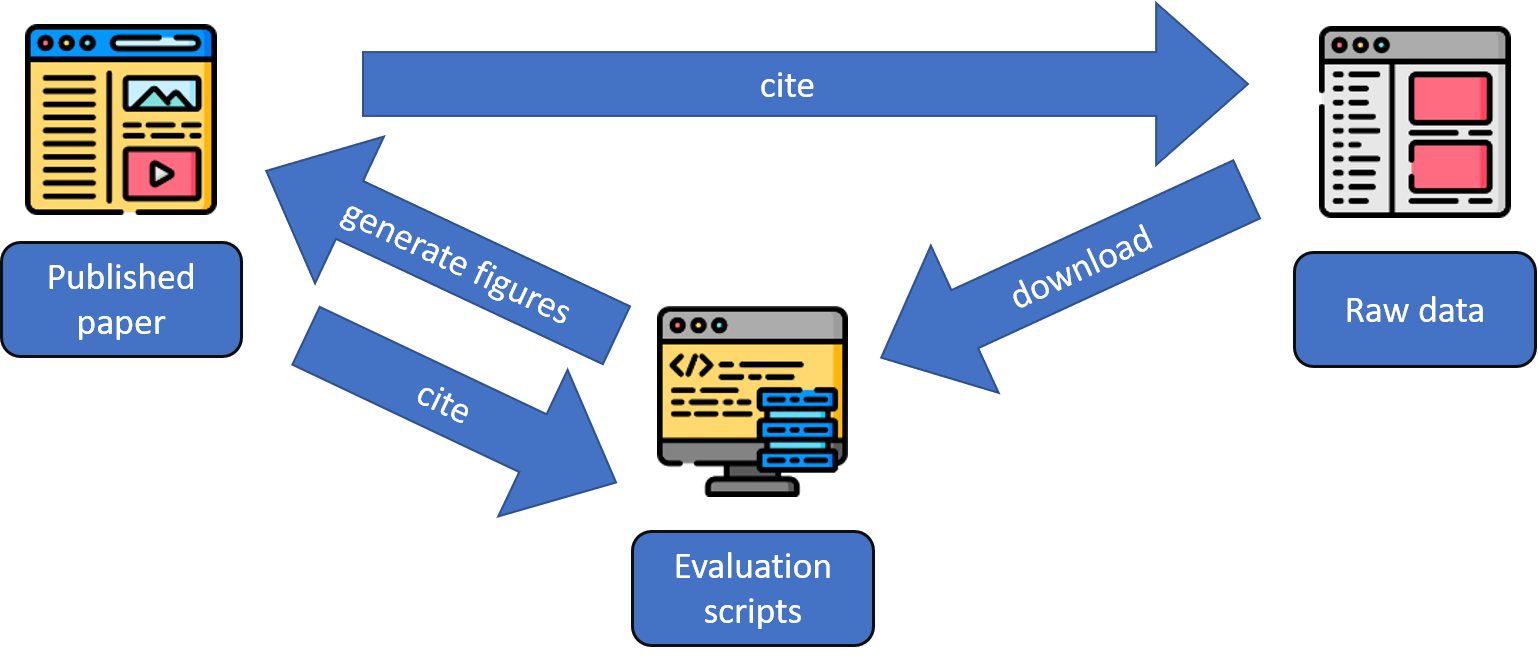

## Script structure

-   Download the data
-   Analyse it
-   Produce figures and tables for paper

See data from the previous year:

[github](https://github.com/me2d09/silicon/blob/main/silicon.ipynb)

## Publishing the scripts

**Github** is perfect for tracking changes, hard to cite

. . .

**figshare** can clone actuall state of repository

-   will make scripts citable (doi)

There should be:

-   `xyz.ipynb` (download data, treat data, generate figures)
-   `requirements.txt` (to be used in 2525)

. . .

Bonus: add paper.tex 💪

## Data reusable forever?

In the year 2525  
if man is still alive  
If woman can survive,  
they may find…

**your data**

. . .

How will computers look like in 2525?

## Data reusable forever?

-   Jupyter notebook is not enough
-   create `requirements.txt` with **locked** versions of libraries
-   use binder to test the script: [mybinder.org](https://mybinder.org/)

or:

-   use [Repo2Docker](https://repo2docker.readthedocs.io/)
-   archive whole repository as a docker image

# Excercise - publish your own data

## Steps

1.  [Create github account](https://github.com/)

2.  [Create Figshare account](https://figshare.com/)

3.  [Create a new repository](https://github.com/new)

    Name: specific heat of VCl3 in field  
    Add README file  
    License: CC0 or MIT  

4.  Sign in for [Colab](https://colab.google/)

    New Notebook

## Download the data

In [1]:
from urllib.request import urlretrieve, urlopen
import json
import os

def download(url, filename):
    # Download the file and save it in the current directory
    try:
        # Remove the file if it exists
        if os.path.exists(filename):
            os.remove(filename)
        # Download and save the file
        urlretrieve(url, filename)
        print(f"File '{filename}' downloaded successfully.")
    except Exception as e:
        print(f"An error occurred during downloading file {filename}: {e}")

## Download the script

In [2]:
url = "https://raw.githubusercontent.com/me2d09/LongHCPulse/refs/heads/master/LongHCPulse.py"
file = "LongHCPulse.py"
download(url,file)

File 'LongHCPulse.py' downloaded successfully.

## Download the data

In [3]:
#Set the base URL and ITEM_ID
BASE_URL = 'https://api.figshare.com/v2'
ITEM_ID = 27151218   # https://doi.org/10.6084/m9.figshare.27151218.v1
#Retrieve public metadata from the endpoint
r=urlopen(f'{BASE_URL}/articles/{ITEM_ID}')
metadata=json.loads(r.read())
for f in metadata["files"]:
    # ???
    pass

## Import and install libraries

In [4]:
!pip install periodictable
import numpy as np
import matplotlib.pyplot as plt
from LongHCPulse import LongHCPulse 
from periodictable import formula

## Read the HC data and calculate HC

In [5]:
mm = formula('VCl3').mass

datafile = "20240530_VCl3_HC_pulses.raw"
DRcalfile = "Puck921.cal"
# find out correct mass
vcl = LongHCPulse(datafile=datafile,calfile=DRcalfile,
    sampmass=1,molarmass=mm, useRawTemp=True)  

vcl.heatcapacity()

**************** LongHCPulse v 1.3.3 *****************
 please cite   https://doi.org/10.1007/s10909-018-2042-9
******************************************************
 - Importing data...
 0%  5%  10%  15%  21%  26%  31%  36%  42%  47%  52%  57%  63%  68%  73%  78%  84%  89%  94%  100%
 - Computing Heat Capacity...
 0%  5%  10%  15%  21%  26%  31%  36%  42%  47%  52%  57%  63%  68%  73%  78%  84%  89%  94%  100%

## Show the figure

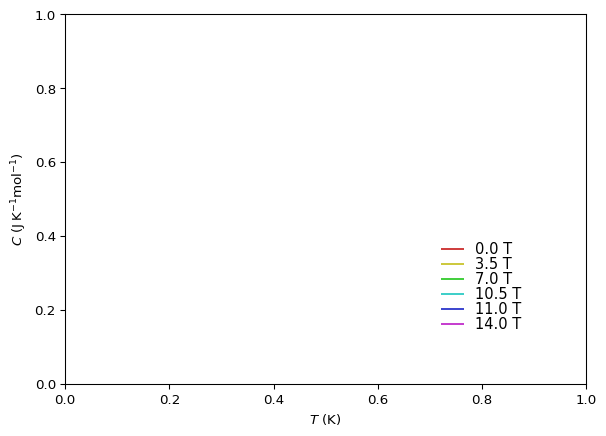

In [6]:
vcl.labels=[]
vcl.shortpulselabels=[]
f,ax = plt.subplots(1,1)

vcl.lineplot(ax,"All", demag=False)  

ax.set_ylabel("$C$ $(\\rm{J\\> K^{-1} mol^{-1}})$")
ax.set_xlabel("$T$ (K)")

# Show legend
short_legend=ax.legend(handles=vcl.shortpulselabels,labelspacing = 0,handlelength=1.4,
    fontsize=11,frameon=False, bbox_to_anchor=(0.97, 1.0),numpoints=1)
long_legend=ax.legend(handles=vcl.labels,labelspacing = 0,handlelength=1.4,fontsize=11,
    frameon=False, bbox_to_anchor=(0.9, 0.42))
ax.add_artist(short_legend)

#FIX that
plt.ylim(0,1)
plt.xlim(0,1)
plt.savefig("fig1.pdf")

# You did IT!!

## Put code to the github

1.  Enable cats
2.  File -\> Download -\> ipynb
3.  Github -\> Add file -\> upload
4.  Edit file -\> github.dev
5.  Add requirements.txt
6.  *What to write there?*

. . .

``` {bash}
pip freeze
```

## Test

Let Binder do the magic

[mybinder.org](https://mybinder.org/)

## Publish it

Everyone wants to have citable DOI

1.  [Figshare](https://figshare.com/)
2.  Import from github
3.  …
4.  Cite it, share it, love it!

# THANKS

## Tomorrow

Meet at 9:00 (sharp) before the Cryopavilon (Building C)

! Prepare your talks, upload slides online. !